# Importar librerías

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

# Carga de datos

In [3]:
data_crud= pd.read_csv('data/Dry_Bean.csv')

In [4]:
data_crud.shape

(569, 33)

In [5]:
data_crud.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Acerca del dataset

About Dataset
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is available in : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

* a) radius (mean of distances from center to points on the perimeter)
* b) texture (standard deviation of gray-scale values)
* c) perimeter
* d) area
* e) smoothness (local variation in radius lengths)
* f) compactness (perimeter^2 / area - 1.0)
* g) concavity (severity of concave portions of the contour)
* h) concave points (number of concave portions of the contour)
* i) symmetry
* j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

# Limpieza

In [6]:
data = data_crud.copy()

In [7]:
data.isna().sum()/len(data)

id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
Unnamed:

In [8]:
data.drop('Unnamed: 32', axis=1, inplace=True)

In [9]:
data[data.duplicated()]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [10]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
data.drop('id', axis=1, inplace=True)

In [12]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


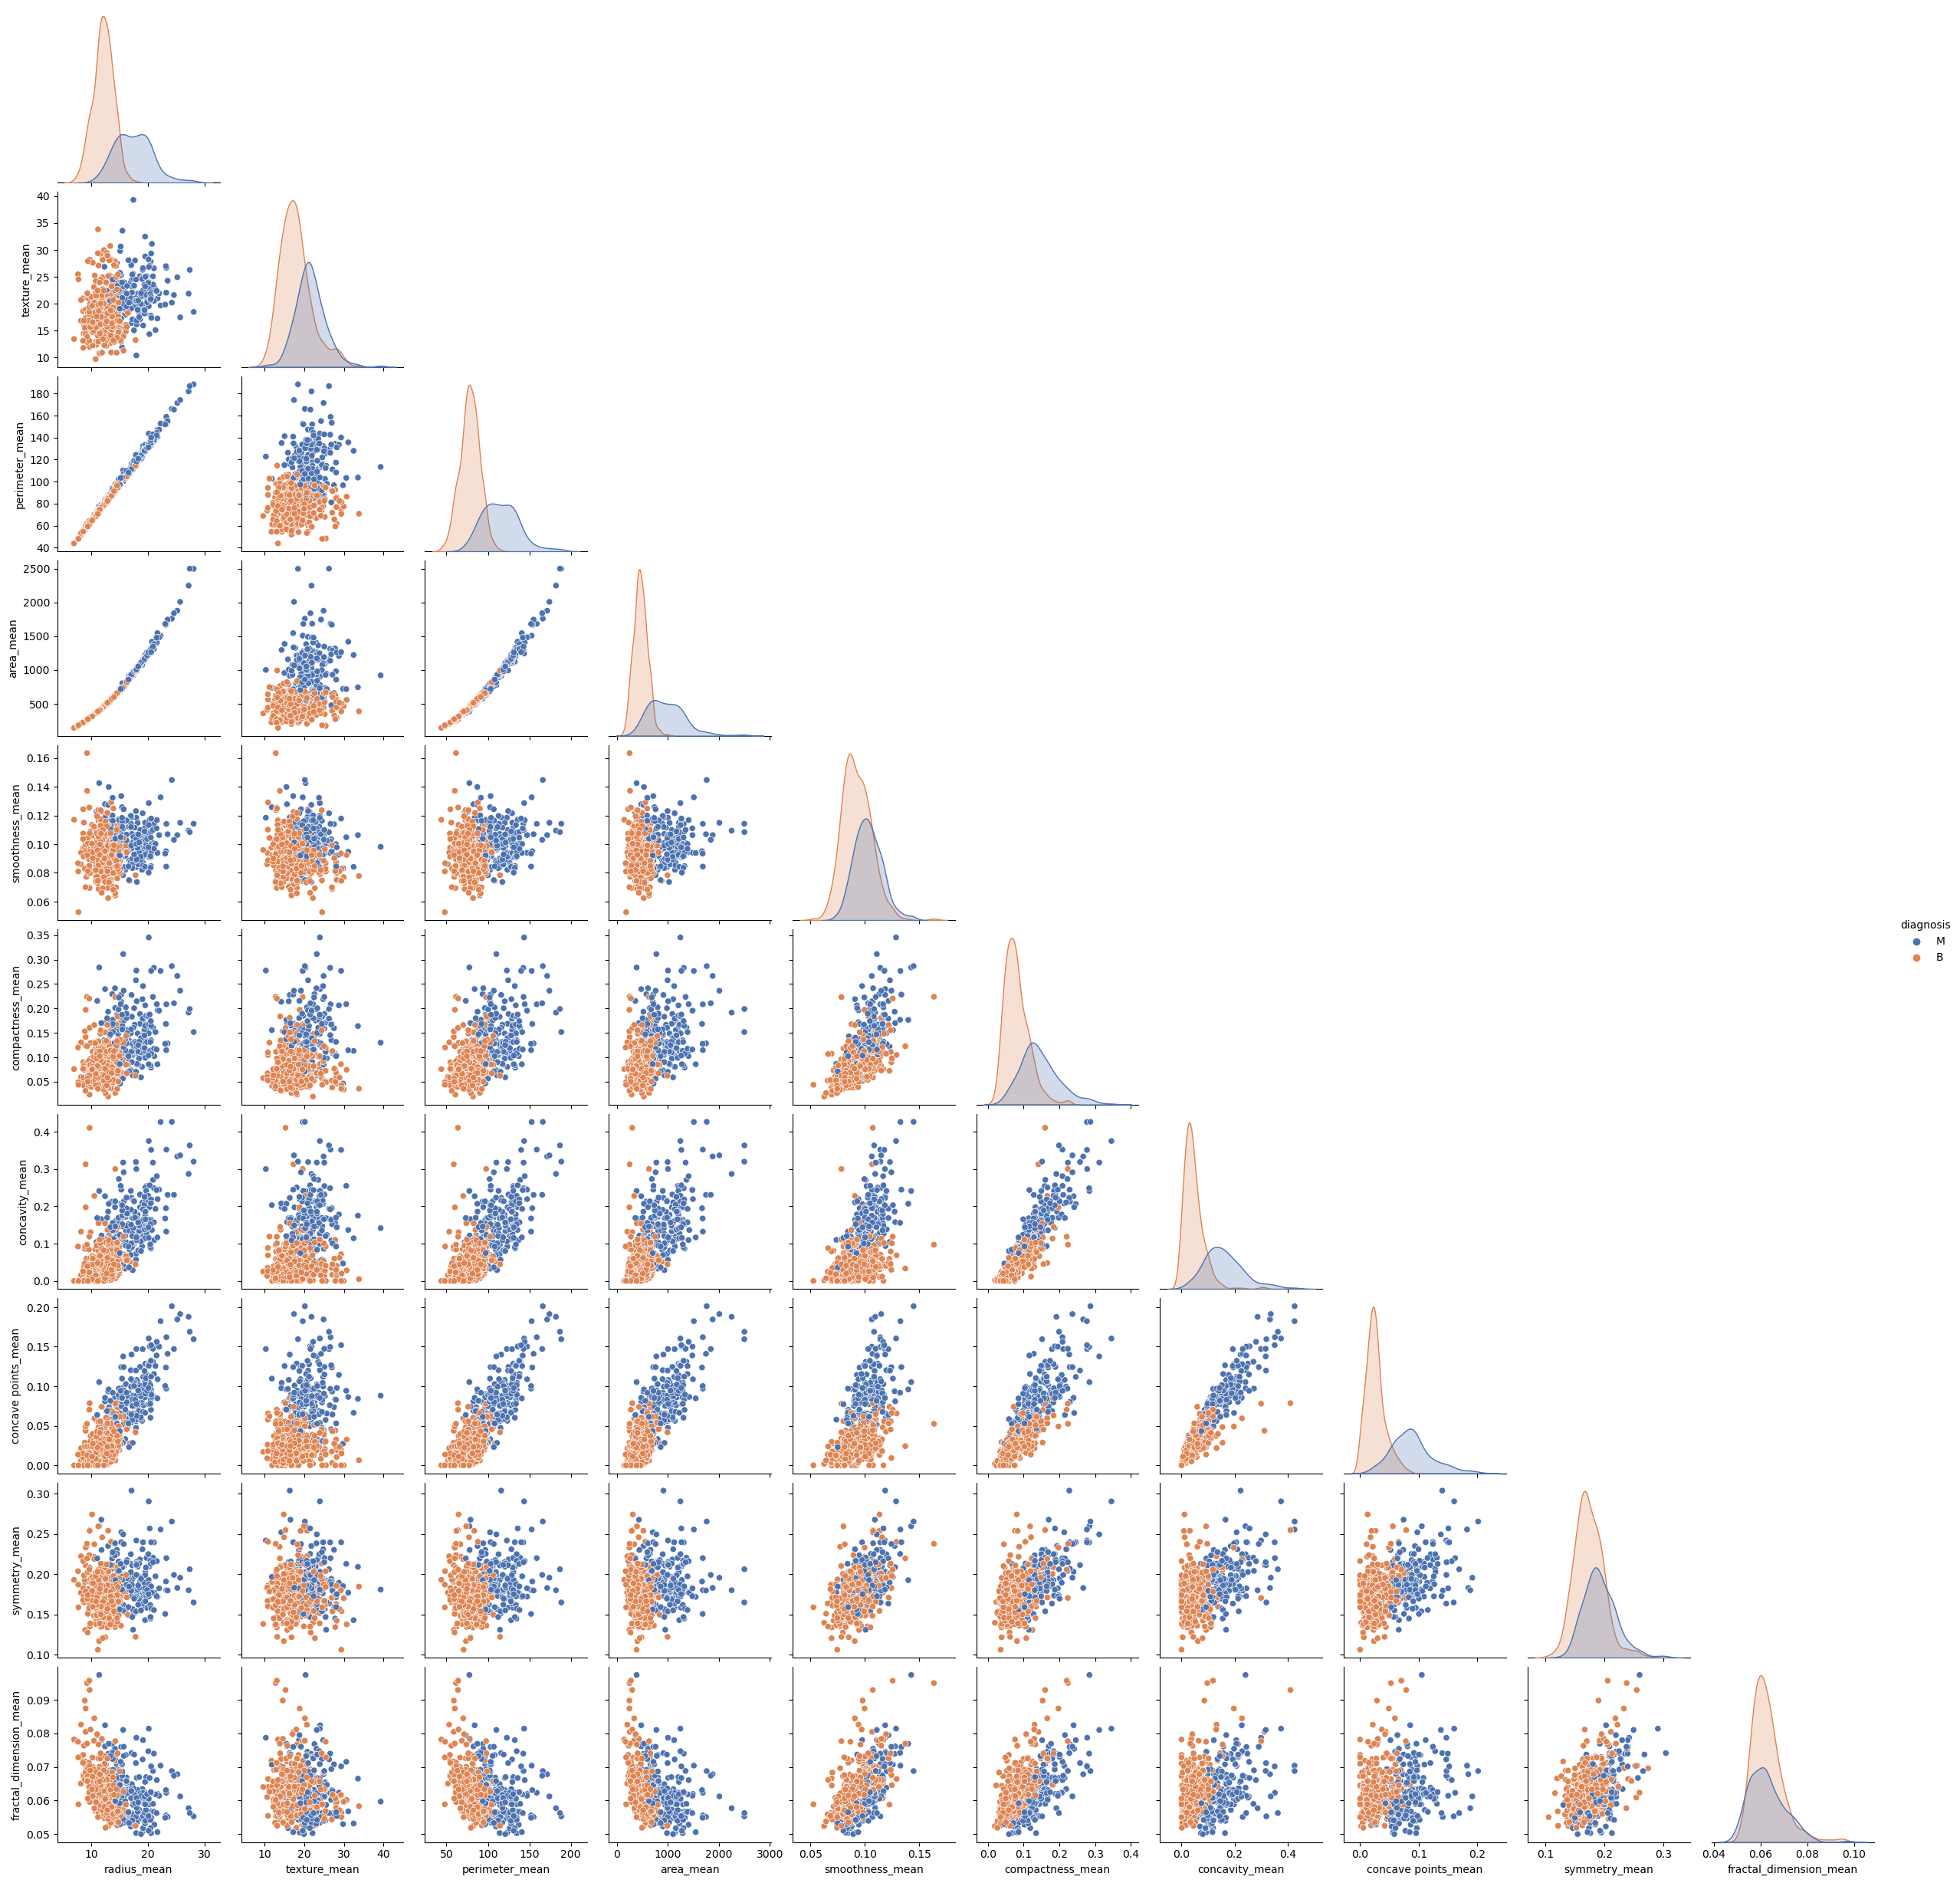

In [13]:
sns.pairplot(data=data[data.columns.tolist()[:11]], hue='diagnosis', corner=True, palette='deep')

Correlaciones

/tmp/ipykernel_3911/4105223441.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=data.corr(),


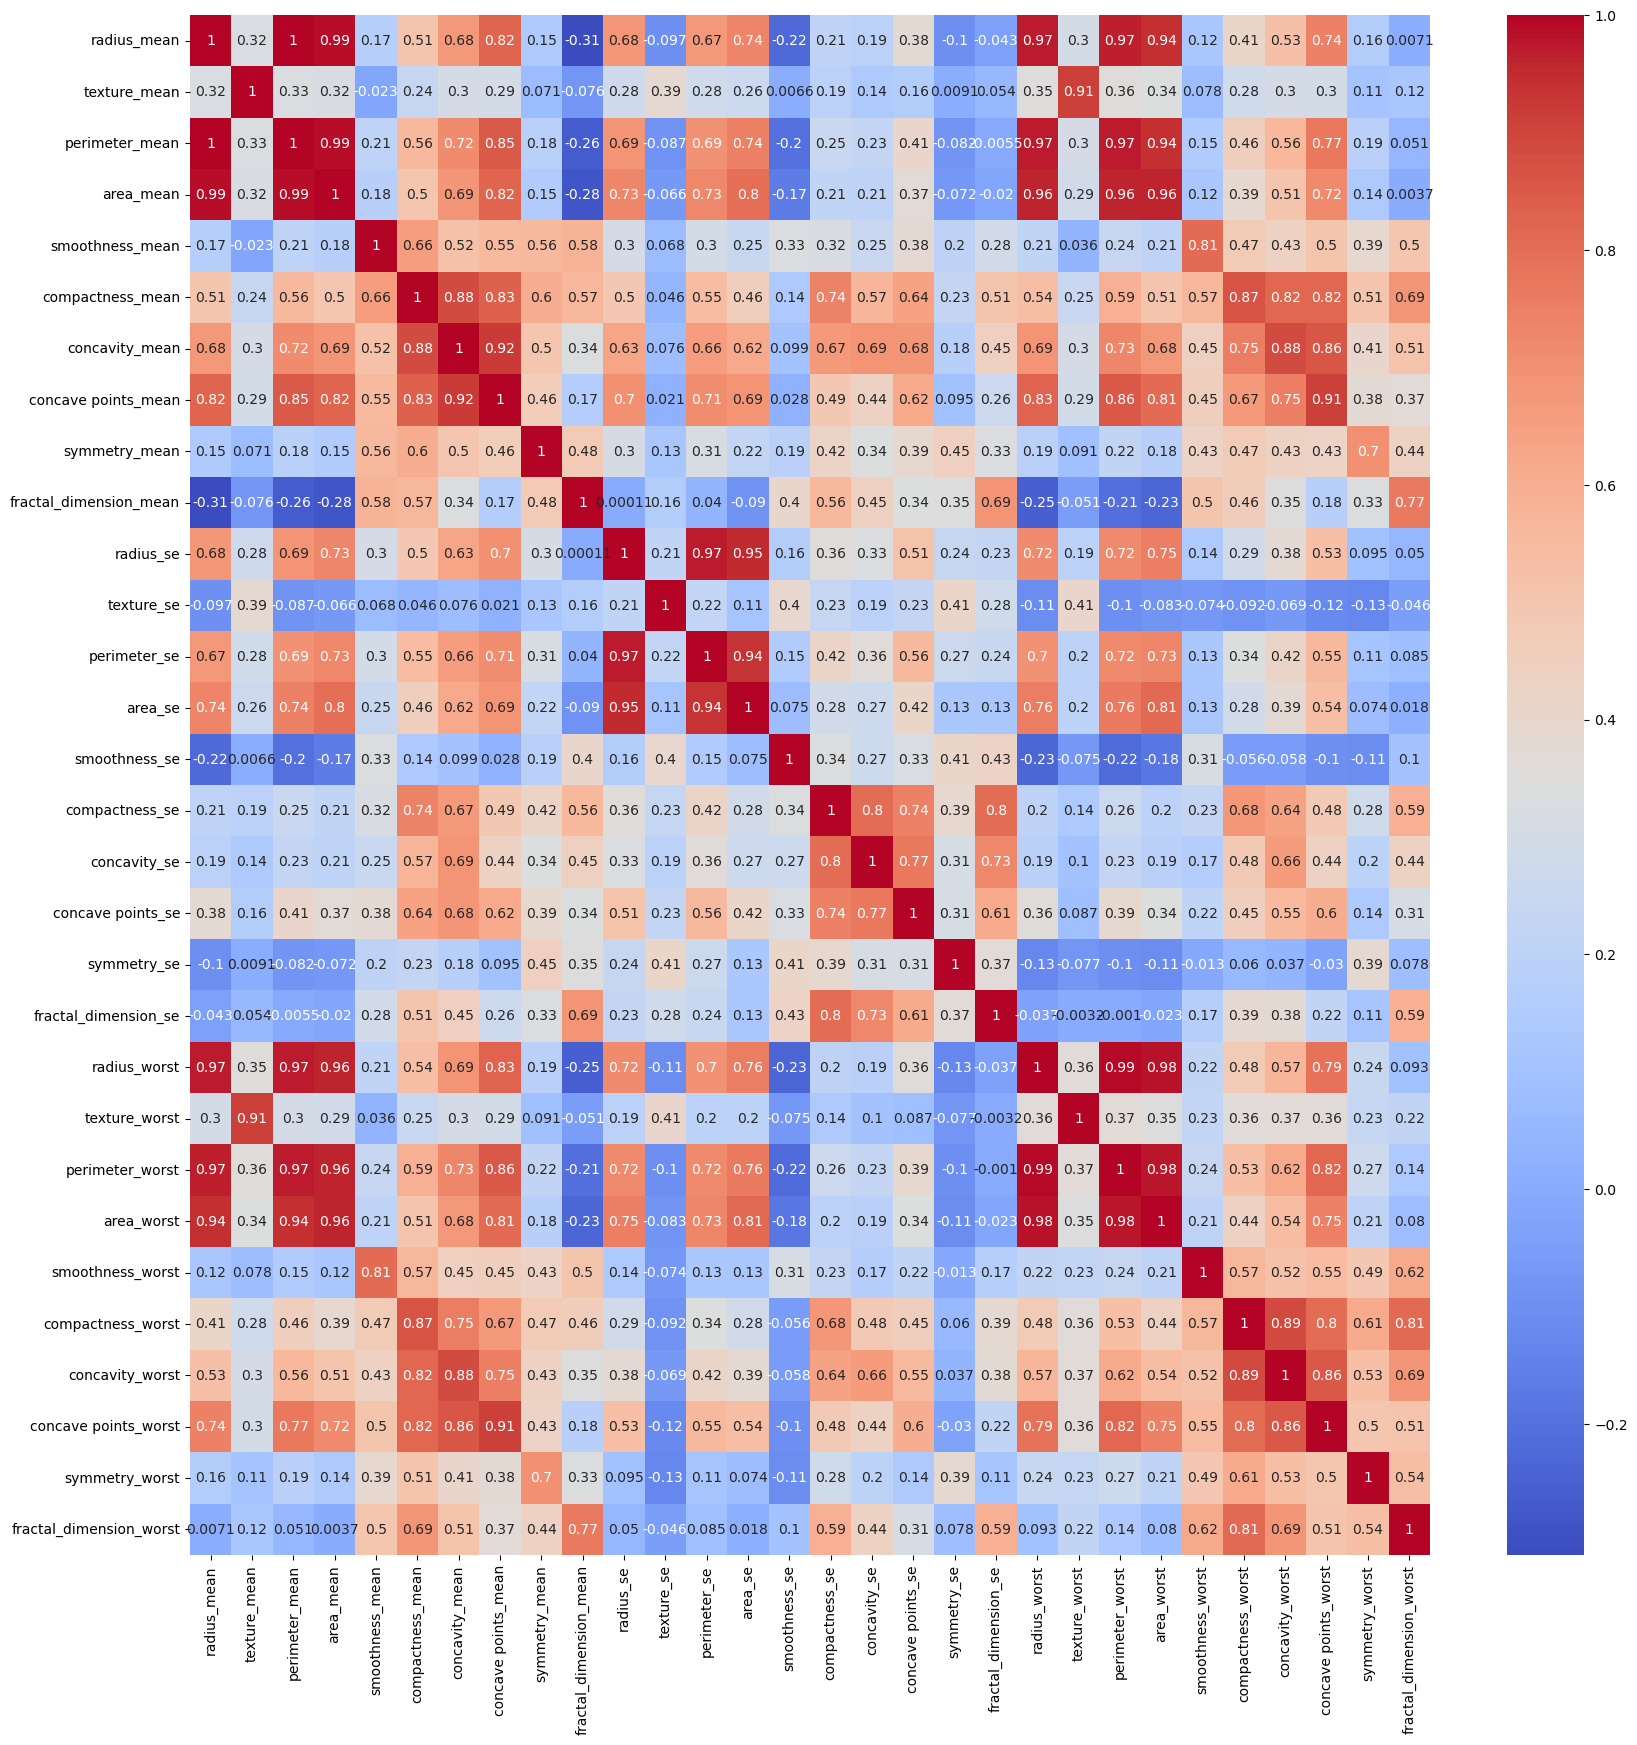

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(
    data=data.corr(),
    cmap='coolwarm',
    annot= True,
    annot_kws= {'size':10}
);

Se puede observar que por naturaleza de los datos hay muchas variables correlacionadas, lo que puede ocasionar que hagan ruido al momento de construir el modelo,lo que se realizara es la creación del modelo con todas las variables para ver su rendimiento, si este no es eficiente se procedera a eliminar las variables con correlacion o por otro lado un ajuste de dimensionalidad

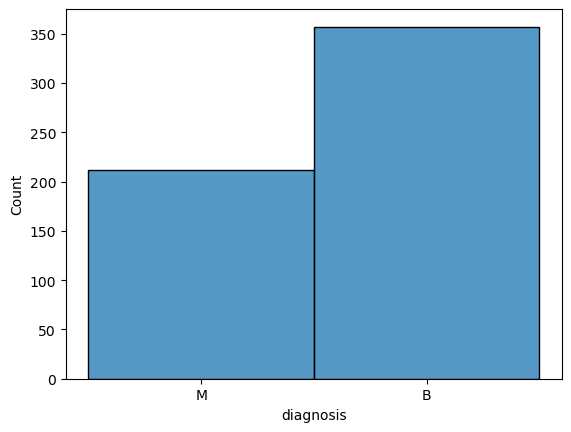

In [15]:
sns.histplot(x=data['diagnosis']);

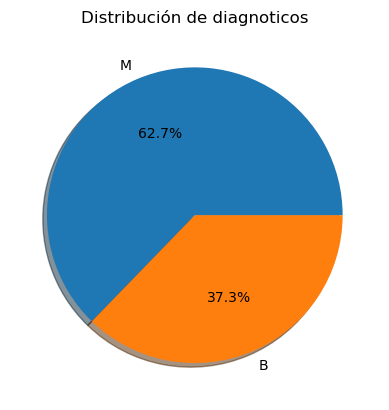

In [16]:
values = list(data.diagnosis.value_counts())
labels = list(data.diagnosis.unique())
plt.pie(x=values, labels=labels, autopct='%1.1f%%', shadow=True )
plt.title("Distribución de diagnoticos")
plt.show()

Se puede observar que hay mas datos de benigno, siendo así que un poco más del 60% de los datos pertenezcan a esta clase

In [17]:
def displot(data, feature):
    sns.displot(
        data=data, 
        x=data[feature],
        hue='diagnosis',
        kde=True
    )
    plt.title(feature)

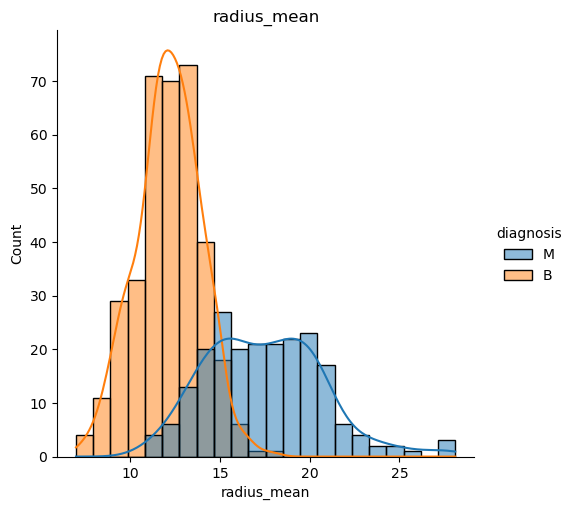

In [18]:
displot(data, 'radius_mean')

# Preprocesar los datos

Para los datos categoricos solo tenemos una columna, la cual es 'diagnosis', asi que procedemos a codificarla para que sea numerica

In [19]:
data.diagnosis.replace(to_replace=['M', 'B'], value=[0,1], inplace=True)

In [20]:
data.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

**Split de datos**

In [62]:
X= data.drop('diagnosis', axis=1)
y=data['diagnosis']

In [63]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)

**Escalar los datos**

In [64]:
data_scaled=data.copy()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
X_train

array([[-0.34913849, -1.43851335, -0.41172595, ..., -0.91671059,
        -0.92508585, -0.80841115],
       [-0.20468665,  0.31264011, -0.13367256, ...,  1.43655962,
         1.14955889,  1.56911143],
       [-0.32931176, -0.21507235, -0.31739376, ..., -0.7237126 ,
         0.53496977, -0.61934827],
       ...,
       [ 0.04739597, -0.56293662, -0.06529202, ..., -1.23262438,
        -0.68282718, -1.261137  ],
       [-0.04040808,  0.09966199, -0.03151368, ...,  1.08847951,
         0.48944465,  1.26159953],
       [-0.5502381 ,  0.31264011, -0.6040977 , ..., -0.59582424,
        -0.29911546, -0.82948141]])

# Clasificación

## Regresión binomial

In [67]:
reg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
y_pred =  reg.predict(X_test)

In [68]:
accuracy_score(y_test, y_pred)

0.9790209790209791

In [69]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[53,  1],
       [ 2, 87]])

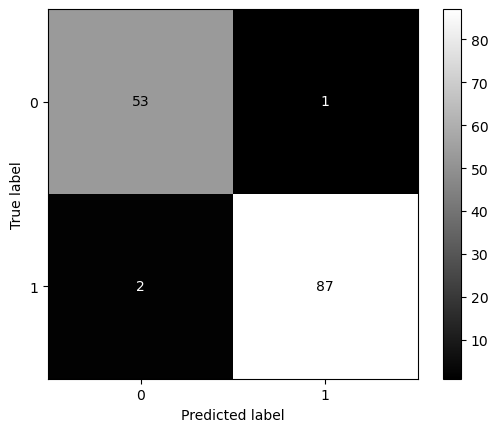

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot(cmap='gray')
plt.show()

AxesSubplot(0.125,0.11;0.775x0.77)


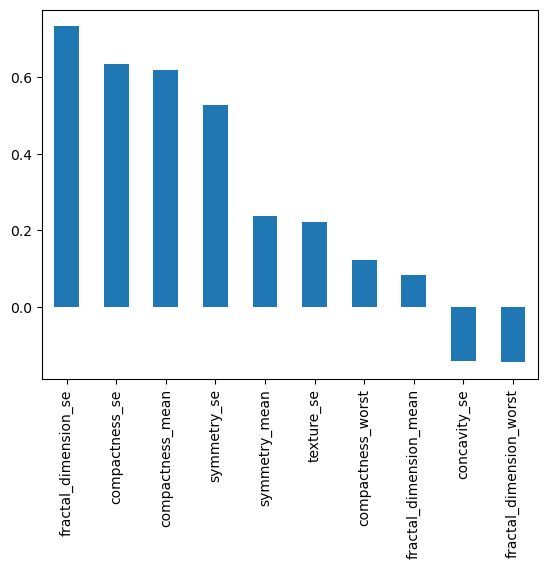

In [72]:
weights = pd.Series(reg.coef_[0],
                    index=X.columns.values) 
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))
